<a href="https://colab.research.google.com/github/sfansaria/Diabetes-Prediction/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing libraries

import numpy as np
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
#Loading the dataset

df = pd.read_csv("/content/drive/My Drive/ml_datasets/diabetes.csv")
print(df.shape)
print(df.head())
print(df.tail())

(768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2  

In [ ]:
#Renaming the columns with short forms


df = df.rename(columns={'DiabetesPedigreeFunction':'DPF'})
df = df.rename(columns={'BloodPressure':'BP'})
df = df.rename(columns={'SkinThickness':'ST'})
print(df.head())

   Pregnancies  Glucose  BP  ST  Insulin   BMI    DPF  Age  Outcome
0            6      148  72  35        0  33.6  0.627   50        1
1            1       85  66  29        0  26.6  0.351   31        0
2            8      183  64   0        0  23.3  0.672   32        1
3            1       89  66  23       94  28.1  0.167   21        0
4            0      137  40  35      168  43.1  2.288   33        1


In [ ]:
'''

#Replacing the 0 values from ['Glucose','BP','ST','Insulin','BMI'] by NaN
df_copy = df.copy(deep=True)
df_copy[['Glucose', 'BP','ST','Insulin','BMI']] = df_copy[['Glucose','BP','ST','Insulin','BMI']].replace(0,np.NaN)
print(df_copy.head())
#Replacing NaN value by mean, median, depending upon distribution
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
df_copy['BP'].fillna(df_copy['BP'].mean(),inplace=True)
df_copy['ST'].fillna(df_copy['ST'].median(),inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(),inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(),inplace=True)

print(df_copy.head())
'''

"\n\n#Replacing the 0 values from ['Glucose','BP','ST','Insulin','BMI'] by NaN\ndf_copy = df.copy(deep=True)\ndf_copy[['Glucose', 'BP','ST','Insulin','BMI']] = df_copy[['Glucose','BP','ST','Insulin','BMI']].replace(0,np.NaN)\nprint(df_copy.head())\n#Replacing NaN value by mean, median, depending upon distribution\ndf_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)\ndf_copy['BP'].fillna(df_copy['BP'].mean(),inplace=True)\ndf_copy['ST'].fillna(df_copy['ST'].median(),inplace=True)\ndf_copy['Insulin'].fillna(df_copy['Insulin'].median(),inplace=True)\ndf_copy['BMI'].fillna(df_copy['BMI'].median(),inplace=True)\n\nprint(df_copy.head())\n"

In [ ]:
diabetes_positive = df[df.Outcome==1]
diabetes_positive.head()

,Pregnancies,Glucose,BP,ST,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


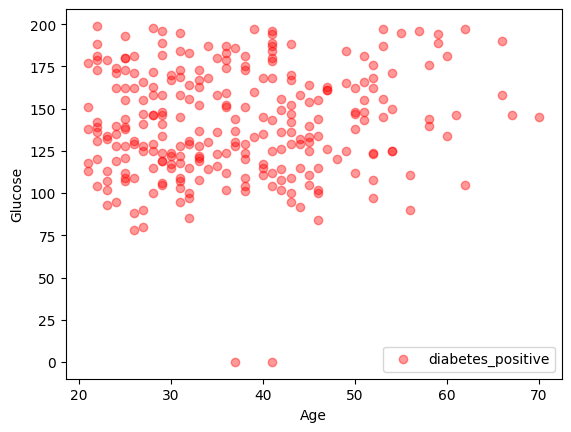

In [ ]:
#import library for plotting

import matplotlib.pyplot as plt

plt.scatter(diabetes_positive.Age,diabetes_positive.Glucose,color="red",label="diabetes_positive",alpha=0.4)
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend()
plt.show()

In [ ]:
diabetes_negative = df[df.Outcome==0]
diabetes_negative.head()


,Pregnancies,Glucose,BP,ST,Insulin,BMI,DPF,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0


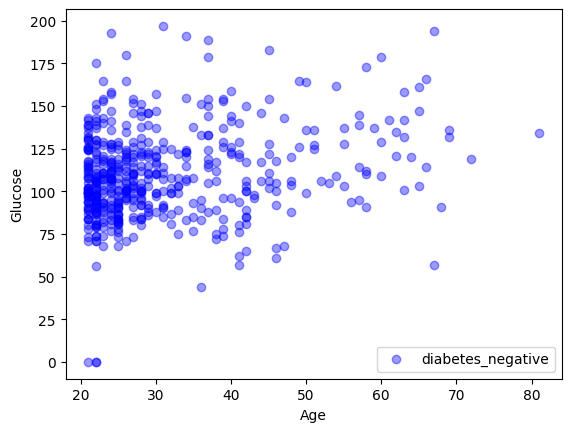

In [ ]:
plt.scatter(diabetes_negative.Age,diabetes_negative.Glucose,color="blue",label="diabetes_negative",alpha=0.4)
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend()
plt.show()

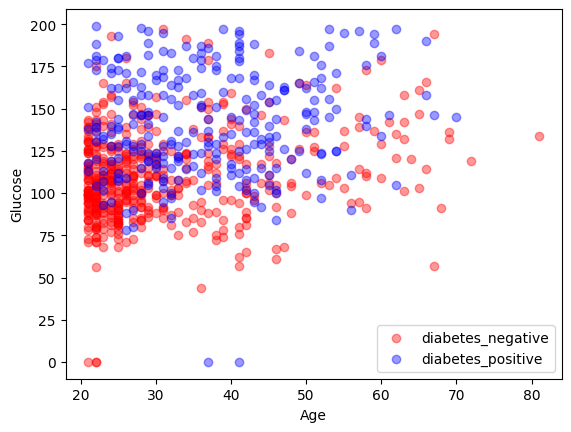

In [ ]:
plt.scatter(diabetes_negative.Age, diabetes_negative.Glucose, color="red", label="diabetes_negative",alpha=0.4)
plt.scatter(diabetes_positive.Age, diabetes_positive.Glucose, color="blue",label="diabetes_positive",alpha=0.4)
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend()
plt.show()

In [ ]:
#Model Building

from sklearn.model_selection import train_test_split

X = df.drop(['Outcome'],axis=1)
y = df.Outcome.values

print(X.head())
print(y[0:5])

   Pregnancies  Glucose  BP  ST  Insulin   BMI    DPF  Age
0            6      148  72  35        0  33.6  0.627   50
1            1       85  66  29        0  26.6  0.351   31
2            8      183  64   0        0  23.3  0.672   32
3            1       89  66  23       94  28.1  0.167   21
4            0      137  40  35      168  43.1  2.288   33
[1 0 1 0 1]


In [ ]:

#Normalization
X_normalized = (X-np.min(X))/(np.max(X)-np.min(X))
print("the data after normalization: ")
print(X_normalized.head())


the data after normalization: 
   Pregnancies   Glucose        BP        ST   Insulin       BMI       DPF  \
0     0.352941  0.743719  0.590164  0.353535  0.000000  0.500745  0.234415   
1     0.058824  0.427136  0.540984  0.292929  0.000000  0.396423  0.116567   
2     0.470588  0.919598  0.524590  0.000000  0.000000  0.347243  0.253629   
3     0.058824  0.447236  0.540984  0.232323  0.111111  0.418778  0.038002   
4     0.000000  0.688442  0.327869  0.353535  0.198582  0.642325  0.943638   

        Age  
0  0.483333  
1  0.166667  
2  0.183333  
3  0.000000  
4  0.200000  


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.20, random_state=1)



In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
prediction_1 = lr.predict(X_test)
print(prediction_1)
print(lr.score(X_test,y_test))

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0
 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0
 0 0 0 1 0 0]
0.7727272727272727


In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=20)
classifier.fit(X_train, y_train)
prediction_2 = classifier.predict(X_test)
print(prediction_2)
print(classifier.score(X_test, y_test))

[1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0
 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0
 0 0 0 1 0 0]
0.7792207792207793


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
prediction = knn.predict(X_test)
print(prediction[0:5])

[0 0 0 0 0]


In [ ]:
print(knn.score(X_test, y_test))


0.7857142857142857


In [ ]:
n = 1
for k in range(1,11):
  n_knn = KNeighborsClassifier(n_neighbors=k)
  n_knn.fit(X_train, y_train)
  print(n, "Score: %",n_knn.score(X_test,y_test)*100)
  n += 1

1 Score: % 69.48051948051948
2 Score: % 74.02597402597402
3 Score: % 78.57142857142857
4 Score: % 75.97402597402598
5 Score: % 79.87012987012987
6 Score: % 79.22077922077922
7 Score: % 81.16883116883116
8 Score: % 79.22077922077922
9 Score: % 78.57142857142857
10 Score: % 79.22077922077922


In [ ]:
#Model After tuning
knn_tune = KNeighborsClassifier(n_neighbors=7)
knn_tune.fit(X_train, y_train)
knn_tune.predict(X_test)[0:5]


array([1, 0, 0, 0, 0])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc.fit_transform(X)


new_prediction = knn_tune.predict(sc.transform(np.array([[4,130,72,35,0,33.6,0.627,30]])))
new_prediction[0]


0